## First draft of modeling Tokenomics

To model the value of the `LasticDA` token over time:

1. **Linear Growth of DAtoken**: The value of `DAtoken` rises linearly.
2. **User Inflows**: User deposits cause small deviations, appearing as noise that never falls below zero.
3. **Foundation Influence**: The DA foundation's deposits cause step-like increases in the `DAtoken` pool value.

```

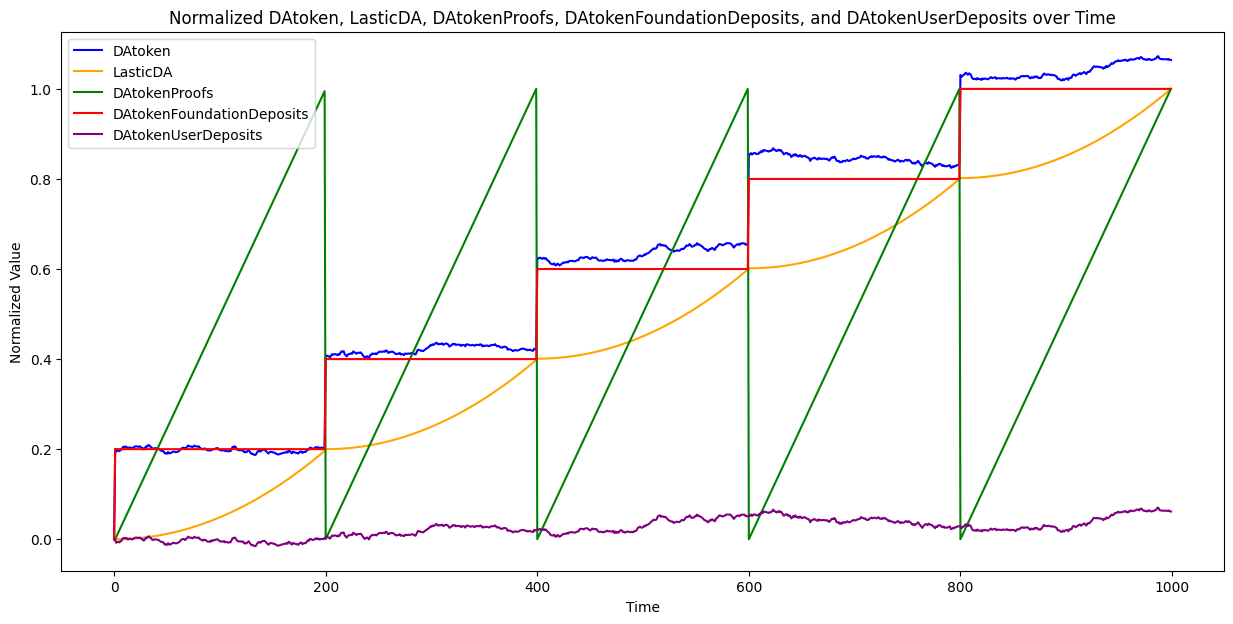

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
total_time = 1000  # Total time for the simulation
user_inflow_std = 5  # Standard deviation of the user inflow noise
foundation_steps = [1, 200, 400, 600, 800]  # Times when the foundation makes contributions
foundation_increase = 500  # Amount of increase due to foundation contribution

# Initialize arrays to store the values over time
DAtokenInPool = np.zeros(total_time)
LasticDA = np.zeros(total_time)
DAtokenProofs = np.zeros(total_time)
DAtokenFoundationDeposits = np.zeros(total_time)
DAtokenUserDeposits = np.zeros(total_time)

# Function to model the inflow/outflow from users
def user_inflow_outflow(time):
    return np.random.normal(0, user_inflow_std)

# Function to model the foundation contribution
def foundation_contribution(time):
    return foundation_increase if time in foundation_steps else 0

# Simulate the process over time
for t in range(1, total_time):
    # Reset DAtokenProofs to zero when foundation contributes
    if t in foundation_steps:
        DAtokenProofs[t] = 0
    else:
        # DAtokenProofs increase linearly over time
        DAtokenProofs[t] = DAtokenProofs[t-1] + 1

    # User inflow/outflow as noise
    user_in_outflow_value = user_inflow_outflow(t)
    DAtokenInPool[t] = max(0, DAtokenInPool[t-1] + user_in_outflow_value)
    DAtokenUserDeposits[t] = DAtokenUserDeposits[t-1] + user_in_outflow_value
    
    # Foundation contribution as step increases
    foundation_contribution_value = foundation_contribution(t)
    DAtokenInPool[t] += foundation_contribution_value
    DAtokenFoundationDeposits[t] = DAtokenFoundationDeposits[t-1] + foundation_contribution_value
    
    # Minting of LasticDA proportional to the pool size and DAtokenProofs
    if DAtokenInPool[t-1] > 0:
        LasticDA[t] = LasticDA[t-1] + DAtokenInPool[t] * 0.1 * (DAtokenProofs[t-1] / DAtokenInPool[t-1])
    else:
        LasticDA[t] = LasticDA[t-1]

# Normalize the values
LasticDA_normalized = (LasticDA - np.min(LasticDA)) / (np.max(LasticDA) - np.min(LasticDA))
DAtokenProofs_normalized = (DAtokenProofs) / (np.max(DAtokenProofs) - np.min(DAtokenProofs))
DAtoken_normalized = (DAtokenInPool) / (np.max(DAtokenFoundationDeposits) - np.min(DAtokenFoundationDeposits))
DAtokenFoundationDeposits_normalized = (DAtokenFoundationDeposits) / (np.max(DAtokenFoundationDeposits) - np.min(DAtokenFoundationDeposits))
DAtokenUserDeposits_normalized = (DAtokenUserDeposits) / (np.max(DAtokenFoundationDeposits))

# Plot the results
plt.figure(figsize=(15, 7))

plt.plot(DAtoken_normalized, label='DAtoken', color='blue')
plt.plot(LasticDA_normalized, label='LasticDA', color='orange')
plt.plot(DAtokenProofs_normalized, label='DAtokenProofs', color='green')
plt.plot(DAtokenFoundationDeposits_normalized, label='DAtokenFoundationDeposits', color='red')
plt.plot(DAtokenUserDeposits_normalized, label='DAtokenUserDeposits', color='purple')

plt.title('Normalized DAtoken, LasticDA, DAtokenProofs, DAtokenFoundationDeposits, and DAtokenUserDeposits over Time')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()

plt.show()
